uint8


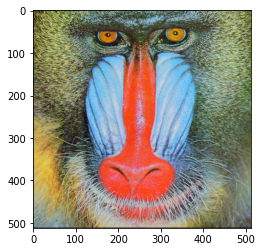

In [50]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


test_image = cv2.imread("baboon_color.png")
test_image_gris = cv2.imread("butterfly.png",0)
imshow(test_image)
print(test_image.dtype)



In [25]:
def imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

(512, 512, 3)


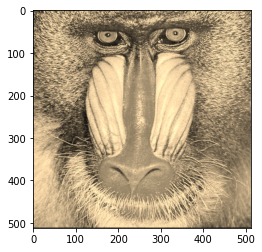

In [26]:
def sepia(image):
    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]

    rp = 0.393*r + 0.796*g + 0.189*b  
    gp = 0.349*r + 0.686*g + 0.168*b  
    bp = 0.272*r + 0.534*g + 0.131*b

    rp = np.where(rp>255,255,rp)
    gp = np.where(gp>255,255,gp)
    bp = np.where(bp>255,255,bp)



    # print(rp.max())
    # print(gp.max())
    # print(bp.max())

    
    new_image = np.stack((bp,gp,rp),axis=2)
    return new_image.astype(np.uint8)


test = sepia(test_image)
print(test.shape)
imshow(test)


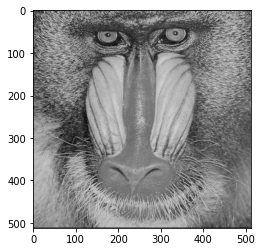

In [27]:
def to_gris(image):
    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]

    i = 0.2989*r + 0.5870*g + 0.1140*b  
    i = np.where(i>255,255,i)

    return i.astype(np.uint8)

imshow( to_gris(test_image) )


In [207]:
h1 = np.array( [ [-1,0,1],[-2,0,2],[-1,0,1] ] )
h2 = np.array( [ [-1,-2,-1],[0,0,0],[1,2,1] ] )
h3 = np.array( [ [-1,-1,-1],[-1,8,-1],[-1,-1,-1] ] )

h4 = 1/9 * np.ones((3,3))
h5 = np.array( [ [-1,-1,2],[-1,2,-1],[2,-1,-1] ] )
h6 = np.array( [ [2,-1,-1],[-1,2,-1],[-1,-1,2] ] )
h7 = np.array( [ [0,0,1],[0,0,0],[-1,0,0] ] )

h8 = np.array( [ 
     [0,0,-1,0,0],
     [0,-1,-2,-1,0],
     [-1,-2,16,-2,-1],
     [0,-1,-2,-1,0],
     [0,0,-1,0,0 ]
 ])
#  h9 = 1/256 * 

In [73]:
import time

def filter(image2D,kernel):
    padding = int((kernel.shape[0]-1)/2) 
    image2D_pad = np.pad( image2D, padding )

    new_image = np.zeros( image2D.shape )

    for x in range( image2D.shape[0] - padding ):
        for y in range ( image2D.shape[1] - padding):
            new_image[x][y] = ( image2D_pad[ x : x + kernel.shape[0] , y : y + kernel.shape[0] ] * kernel ).sum()

    new_image = np.where(new_image>255,255,new_image)
    new_image = np.where(new_image<0,0,new_image)

    
    return new_image.astype(np.uint8)



list_times = []
for i in range(10):
    t1 = time.time()
    filter(test_image_gris,h2)
    t2 = time.time()
    print ( t2 - t1)
    list_times.append(t2-t1)

print( "AVG" ,sum(list_times)/len(list_times) )




1.0739240646362305
1.0489599704742432
1.2432138919830322
1.0997226238250732
1.0418879985809326
1.0248794555664062
1.022322177886963
1.0172312259674072
1.020517110824585
1.0167503356933594
AVG 1.0609408855438232


In [74]:

list_times = []
for i in range(10):
    t1 = time.time()
    cv2.filter2D(test_image_gris,-1,h2)
    t2 = time.time()
    print ( t2 - t1)
    list_times.append(t2-t1)

print( "AVG" ,sum(list_times)/len(list_times) )




0.0005404949188232422
0.00032520294189453125
0.00047469139099121094
0.0005917549133300781
0.0005774497985839844
0.0004487037658691406
0.0003657341003417969
0.0004649162292480469
0.00038313865661621094
0.0004940032958984375
AVG 0.00046660900115966795


In [108]:


a = np.arange(16)
print(a, "\n")
print ( a.reshape((4,4)) )

kernel = np.arange(4,8).reshape(2,2)
kernel



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[4, 5],
       [6, 7]])

In [186]:
# out = 
b = np.zeros((9,16))

kernel_s = kernel.shape[0]
# print(b)


for i in range(3):
    for j in range(3):
        for k in range(kernel_s):
            for l in range(kernel_s):
                print( i*3 + j , i*4 + j + 4*k + l )
                b[i*3 + j][i*4 + j + 4*k + l] = kernel[k][l]


print(b)
b.shape

0 0
0 1
0 4
0 5
1 1
1 2
1 5
1 6
2 2
2 3
2 6
2 7
3 4
3 5
3 8
3 9
4 5
4 6
4 9
4 10
5 6
5 7
5 10
5 11
6 8
6 9
6 12
6 13
7 9
7 10
7 13
7 14
8 10
8 11
8 14
8 15
[[4. 5. 0. 0. 6. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 5. 0. 0. 6. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 5. 0. 0. 6. 7. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 5. 0. 0. 6. 7. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 5. 0. 0. 6. 7. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 5. 0. 0. 6. 7. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 5. 0. 0. 6. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 5. 0. 0. 6. 7. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 5. 0. 0. 6. 7.]]


(9, 16)

In [204]:
def filter2(image,kernel):
    padding = int((kernel.shape[0]-1)/2) 
    
    image_pad = np.pad( image, padding )

    image_flat = image.reshape(-1,1)
    image_pad_flat = image_pad.reshape(-1,1)

    print( image_pad_flat.shape )
    print( image_flat.shape )


    kernel_s = kernel.shape[0]

    kernel_view = np.zeros( ( image_flat.shape[0] , image_pad_flat.shape[0] ) , dtype="int8")

    for i in range(image.shape[0]):
        for j in range(image.shape[0]):
            for k in range(kernel_s):
                for l in range(kernel_s):
                    print( i*3 + j , i*4 + j + 4*k + l )
                    kernel_view[i*image.shape[0] + j][i*image2D_pad.shape[0] + j + image2D_pad.shape[0]*k + l] = kernel[k][l]


    new_image = np.matmul( kernel_view , image2D_pad.reshape(-1,1) )
    print(new_image)





    new_image = np.where(new_image>255,255,new_image)
    new_image = np.where(new_image<0,0,new_image)

    
    return new_image.astype(np.uint8)

filter2(test_image_gris,h1)

(264196, 1)
(262144, 1)


MemoryError: Unable to allocate 64.5 GiB for an array with shape (262144, 264196) and data type int8